In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
commute_mode = pd.read_csv("data_raw/commute_mode.csv")

In [3]:
commute_mode.head()

,city,state,city_size,mode,n,percent,moe,state_abb,state_region
0,Aberdeen city,South Dakota,Small,Bike,110,0.8,0.5,SD,North Central
1,Acworth city,Georgia,Small,Bike,0,0.0,0.4,GA,South
2,Addison village,Illinois,Small,Bike,43,0.2,0.3,IL,North Central
3,Adelanto city,California,Small,Bike,0,0.0,0.5,CA,West
4,Adrian city,Michigan,Small,Bike,121,1.5,1.0,MI,North Central


In [4]:
df = commute_mode.groupby(['city_size', 'mode']).agg({'n':'sum'}).reset_index()
df

,city_size,mode,n
0,Large,Bike,282358
1,Large,Walk,1281135
2,Medium,Bike,94864
3,Medium,Walk,317905
4,Small,Bike,191477
5,Small,Walk,796415


In [5]:
df['total'] = df.groupby('city_size')['n'].transform('sum')
df

,city_size,mode,n,total
0,Large,Bike,282358,1563493
1,Large,Walk,1281135,1563493
2,Medium,Bike,94864,412769
3,Medium,Walk,317905,412769
4,Small,Bike,191477,987892
5,Small,Walk,796415,987892


In [6]:
df['prop'] = df['n'] / df['total']
df

,city_size,mode,n,total,prop
0,Large,Bike,282358,1563493,0.180594
1,Large,Walk,1281135,1563493,0.819406
2,Medium,Bike,94864,412769,0.229823
3,Medium,Walk,317905,412769,0.770177
4,Small,Bike,191477,987892,0.193824
5,Small,Walk,796415,987892,0.806176


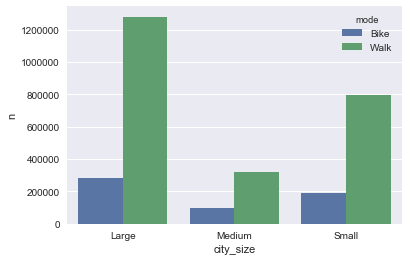

In [7]:
sns.barplot(data=df, x="city_size", y="n", hue="mode");

In [8]:
import plotly.express as px

In [13]:
px.bar(df, x='city_size', y='n', color='mode', barmode='group')